In [4]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.linalg import inv
import time

# Case 4: Numerical Methods for European Option Pricing

## Part 1: Fourier

In [3]:
r = 0.01       
sigma = 0.15   
T = 10          
t = 0          
n = 100
guarantee = 100
S0 = 100

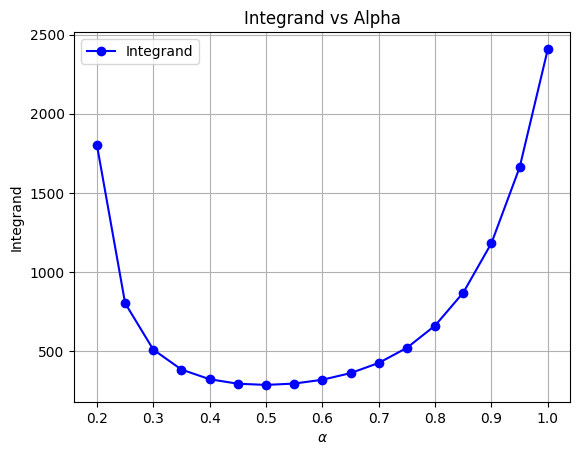

Optimal alpha: 0.49999999999999994
Integration result for alpha=0.5: 25.42029560047405


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Fourier transform of *tilted* option payoff
def f_alpha_star(xi, S0, K, sigma, r, T, alpha):
    rsigT = (r - 0.5 * sigma**2) * T
    # W Bar
    w = (np.log(K / S0) - rsigT) / sigma
    tilted_f = (
        -S0 * np.exp(rsigT + (1j * xi + sigma - alpha) * w) / (1j * xi + sigma - alpha) +
        K * np.exp((1j * xi - alpha) * w) / (1j * xi - alpha)
    )
    return tilted_f

# Characteristic function for brownian motion WT | Wt
def cha_f(xi, alpha, W_t, T, t):
    complex_arg = -xi - 1j * alpha
    phi = np.exp(1j * complex_arg * W_t - 0.5 * (complex_arg**2) * (T - t))
    return phi

# Define the integrand function
def integrand(xi, alpha):
    return np.real(
        f_alpha_star(xi, 100, 100, 0.15, 0.01, 10, alpha) * cha_f(xi, alpha, 0, 10, 0)
    )

# Calculate integrand values for different alpha values
alpha_values = np.arange(0.2, 1.05, 0.05)
integrand_values = []

for alpha in alpha_values:
    integrand_values.append(integrand(0, alpha))

# Find the alpha value that minimizes the integrand
optimal_alpha = alpha_values[np.argmin(integrand_values)]

# Plotting the results
plt.plot(alpha_values, integrand_values, marker='o', color='blue', label='Integrand')
plt.xlabel(r'$\alpha$')
plt.ylabel('Integrand')
plt.title('Integrand vs Alpha')
plt.grid(True)
plt.legend()
plt.show()

print(f"Optimal alpha: {optimal_alpha}")

#############################################################

# auxiliary function for integration
def integrand2(xi, alpha):
    return np.real(
        f_alpha_star(xi, 100, 100, 0.15, 0.01, 10, alpha) * cha_f(xi, alpha, 0, 10, 0)
    ) / (2 * np.pi)

# Create a function to integrate integrand2 over a range of xi
def integrate_function(alpha):
    result, _ = quad(lambda xi: integrand2(xi, alpha), -np.inf, np.inf)
    return result

# Example calculation
result = integrate_function(0.5)
print(f"Integration result for alpha=0.5: {result}")


In [15]:
option_price = integrate_function(0.5)
print(f"Option price for alpha=0.5: {option_price}")

Option price for alpha=0.5: 25.42029560047405


In [8]:
def binomialTree_ORIGINAL(r, sigma, T, guarantee, n):

    dt = T / n
    R_dt = np.exp(r * dt)

    u = R_dt * np.exp(sigma * np.sqrt(dt))
    d = R_dt * np.exp(- sigma * np.sqrt(dt))
    
    p = (R_dt - d) / (u - d)
    q = 1 - p

    # Stock price 
    stockValues = 100 * u**np.arange(n + 1) * d**(n - np.arange(n + 1))

    # option prices
    contractPrice = np.maximum(stockValues - guarantee, 0)

    for i in np.arange(n,0,-1):
        contractPrice = (1/R_dt) * (p * contractPrice[1:i+1] + q * contractPrice[0:i])

    return contractPrice[0]

option_price = binomialTree_ORIGINAL(r, sigma, T, guarantee, n) 
print("Call Option Price normal Binomial Model:", option_price)

Call Option Price normal Binomial Model: 22.97432246410553
